In [ ]:
pip install -U sentence-transformers

In [12]:
from sentence_transformers import util
import numpy as np

Let us begin by loading the embeddings.

In [8]:
import pandas as pd

# Load the embeddings
df_orig_distiluse_class_le = pd.read_csv('/content/df-orig-distil-class-le.csv')
df_orig_para_mini_class_le = pd.read_csv('/content/df-orig-para-mini-class-le.csv')
df_orig_para_base_class_le = pd.read_csv('/content/df-orig-para-base-class-le.csv')

df_proc_distiluse_class_le = pd.read_csv('/content/df-proc-distil-class-le.csv')
df_proc_para_mini_class_le = pd.read_csv('/content/df-proc-para-mini-class-le.csv')
df_proc_para_base_class_le = pd.read_csv('/content/df-proc-para-base-class-le.csv')
# Define the categories
categories = ['Beer', 'Burger', 'Champagne', 'Cider', 'CoffeeTeaMilk', 'Dessert', 
              'Kids', 'Other', 'Salad', 'SoftDrinks', 'Spirits', 'VariedFood', 'Wine', 'Wings']

Let us begin by using the entire dataset to calculate the average embedding of every group.

In [9]:
# For the 'distiluse-base-multilingual-cased-v2' model
# Original dataset
average_emb_distiluse_orig = []
for category in categories:
  df = df_orig_distiluse_class_le[df_orig_distiluse_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_distiluse_orig.append(df_mean)

# Processed dataset
average_emb_distiluse_proc = []
for category in categories:
  df = df_proc_distiluse_class_le[df_proc_distiluse_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_distiluse_proc.append(df_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# For the 'paraphrase-multilingual-MiniLM-L12-v2' model
# Original dataset
average_emb_para_mini_orig = []
for category in categories:
  df = df_orig_para_mini_class_le[df_orig_para_mini_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_para_mini_orig.append(df_mean)

# Processed dataset
average_emb_para_mini_proc = []
for category in categories:
  df = df_proc_para_mini_class_le[df_proc_para_mini_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_para_mini_proc.append(df_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
# For the 'paraphrase-multilingual-mpnet-base-v2' model
# Original dataset 
average_emb_para_base_orig = []
for category in categories:
  df = df_orig_para_base_class_le[df_orig_para_base_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_para_base_orig.append(df_mean)

# Processed dataset 
average_emb_para_base_proc = []
for category in categories:
  df = df_proc_para_base_class_le[df_proc_para_base_class_le['Class1']==category]
  # Drop the superfluous columns
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  df_mean = df.mean().values.tolist()
  average_emb_para_base_proc.append(df_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now we can calculate the average error for every category, where the error = 1 - cos_sim(embedding, ave_embedding_category) for all embeddings in a category. In addition, we can also calculate the average of the average errors to get a sense of how well the model performed.  

In [13]:
# For the 'distiluse-base-multilingual-cased-v2' model
# Original dataset
errors_categories_distiluse_orig = []
for i in range(len(categories)):
  df = df_orig_distiluse_class_le[df_orig_distiluse_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_distiluse_orig[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_distiluse_orig.append(avg_err_cat)

avg_error_distiluse_orig = np.mean(errors_categories_distiluse_orig)
print("Average error of the distiluse model, original data = ", avg_error_distiluse_orig)

# Processed dataset
errors_categories_distiluse_proc = []
for i in range(len(categories)):
  df = df_proc_distiluse_class_le[df_proc_distiluse_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_distiluse_proc[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_distiluse_proc.append(avg_err_cat)

avg_error_distiluse_proc = np.mean(errors_categories_distiluse_proc)
print("Average error of the distiluse model, processed data = ", avg_error_distiluse_proc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Beer average error = 0.4181541837397076
Burger average error = 0.15320111172539846
Champagne average error = 0.30525710582733157
Cider average error = 0.3300479395048959
CoffeeTeaMilk average error = 0.2645779764279723
Dessert average error = 0.25527550957419654
Kids average error = 0.18376439384051732
Other average error = 0.26920985324042185
Salad average error = 0.1490752339363098
SoftDrinks average error = 0.37150480449199674
Spirits average error = 0.45640783085681425
VariedFood average error = 0.4253638302286466
Wine average error = 0.44038394597214714
Wings average error = 0.16834097603956857
Average error of the distiluse model, original data =  0.2993260496718518
Beer average error = 0.42114792913198473
Burger average error = 0.15320110888708205
Champagne average error = 0.27298644185066223
Cider average error = 0.3099356208528791
CoffeeTeaMilk average error = 0.24247363415257683
Dessert average error = 0.25527550957419654
Kids average error = 0.18376441938536509
Other average

In [14]:
# For the 'paraphrase-multilingual-MiniLM-L12-v2' model
# Original dataset
errors_categories_para_mini_orig = []
for i in range(len(categories)):
  df = df_orig_para_mini_class_le[df_orig_para_mini_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_para_mini_orig[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_para_mini_orig.append(avg_err_cat)

avg_error_para_mini_orig = np.mean(errors_categories_para_mini_orig)
print("Average error of the para-mini model, original data = ", avg_error_para_mini_orig)

# Processed dataset
errors_categories_para_mini_proc = []
for i in range(len(categories)):
  df = df_proc_para_mini_class_le[df_proc_para_mini_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_para_mini_proc[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_para_mini_proc.append(avg_err_cat)

avg_error_para_mini_proc = np.mean(errors_categories_para_mini_proc)
print("Average error of the para-mini model, processed data = ", avg_error_para_mini_proc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Beer average error = 0.4060156152361915
Burger average error = 0.16317686012813024
Champagne average error = 0.280228328704834
Cider average error = 0.35993335928235737
CoffeeTeaMilk average error = 0.2871701139956713
Dessert average error = 0.3151837180961262
Kids average error = 0.2744613417557308
Other average error = 0.3259931802749634
Salad average error = 0.18259392380714418
SoftDrinks average error = 0.40405533969402313
Spirits average error = 0.4499983548527897
VariedFood average error = 0.43731678103407223
Wine average error = 0.3973142937035628
Wings average error = 0.16700596113999686
Average error of the para-mini model, original data =  0.3178890836932567
Beer average error = 0.4085450530052185
Burger average error = 0.16317686012813024
Champagne average error = 0.23912415653467178
Cider average error = 0.36715626290866304
CoffeeTeaMilk average error = 0.26720238348533365
Dessert average error = 0.3151837099682201
Kids average error = 0.27446135027068
Other average error =

In [15]:
# For the 'paraphrase-multilingual-mpnet-base-v2' model
# Original dataset
errors_categories_para_base_orig = []
for i in range(len(categories)):
  df = df_orig_para_base_class_le[df_orig_para_base_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_para_base_orig[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_para_base_orig.append(avg_err_cat)

avg_error_para_base_orig = np.mean(errors_categories_para_base_orig)
print("Average error of the para base model, original data = ", avg_error_para_base_orig)

# Processed dataset
errors_categories_para_base_proc = []
for i in range(len(categories)):
  df = df_proc_para_base_class_le[df_proc_para_base_class_le['Class1']==categories[i]]
  df.drop(labels=['ArticleName', 'ArticleGroupName', 'Class1', 'ClassLabel'], axis=1, inplace=True)
  avg_emb_cat = average_emb_para_base_proc[i]
  err_cat = []
  for j in range(len(df)):
    emb_item = df.iloc[j].values.tolist()
    cos_sim = util.cos_sim(emb_item, avg_emb_cat)
    err = 1 - cos_sim[0][0].numpy()
    err_cat.append(err)
  
  avg_err_cat = np.mean(err_cat)
  print(str(categories[i]) + " average error = " + str(avg_err_cat))
  errors_categories_para_base_proc.append(avg_err_cat)

avg_error_para_base_proc = np.mean(errors_categories_para_base_proc)
print("Average error of the para base model, processed data = ", avg_error_para_base_proc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Beer average error = 0.38060671318145023
Burger average error = 0.1492778119586763
Champagne average error = 0.16510926485061644
Cider average error = 0.24421802588871547
CoffeeTeaMilk average error = 0.2373707452788949
Dessert average error = 0.23179766806689175
Kids average error = 0.22387267010552542
Other average error = 0.2923394611903599
Salad average error = 0.10976433753967285
SoftDrinks average error = 0.3335033851861954
Spirits average error = 0.40363836111408646
VariedFood average error = 0.36049164136250816
Wine average error = 0.3720813888899038
Wings average error = 0.13800856471061707
Average error of the para base model, original data =  0.2601485742374367
Beer average error = 0.4298372929294904
Burger average error = 0.14927782047362553
Champagne average error = 0.17451836168766022
Cider average error = 0.2475076871258872
CoffeeTeaMilk average error = 0.23167033647668772
Dessert average error = 0.23179768432270398
Kids average error = 0.22387258921350753
Other average 

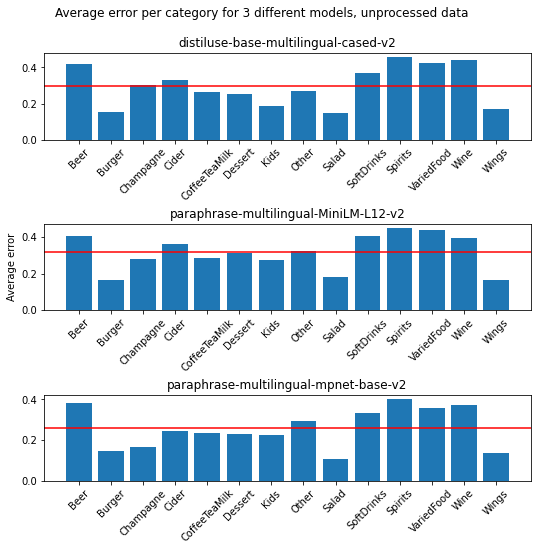

In [20]:
'''
Visualise the results.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

import matplotlib.pyplot as plt

# Average error per category for the 3 different models
# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
# Subplots - change arguments here for every score
ax1.bar(categories, errors_categories_distiluse_orig)
ax2.bar(categories, errors_categories_para_mini_orig)
ax3.bar(categories, errors_categories_para_base_orig)

ax1.axhline(avg_error_distiluse_orig, color='red')
ax2.axhline(avg_error_para_mini_orig, color='red')
ax3.axhline(avg_error_para_base_orig, color='red')

ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)
ax3.tick_params(axis='x',labelrotation=45)

# Set the suptitle and common labels
fig.suptitle('Average error per category for 3 different models, unprocessed data')
ax.set_ylabel('Average error')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('average_err_cat_orig', dpi=300)
plt.show()

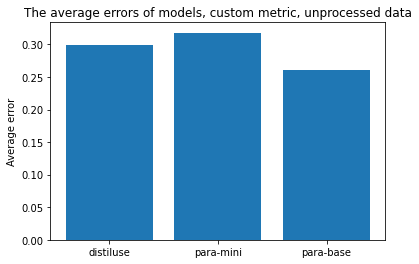

In [21]:
# Original data
# Compare the average errors of models
average_errors_models_orig = [avg_error_distiluse_orig, avg_error_para_mini_orig, avg_error_para_base_orig]
models = ['distiluse', 'para-mini', 'para-base']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(models, average_errors_models_orig)

ax.set_title('The average errors of models, custom metric, unprocessed data')
ax.set_ylabel('Average error')

plt.savefig('average_errors_models_orig', dpi=300)
plt.show()

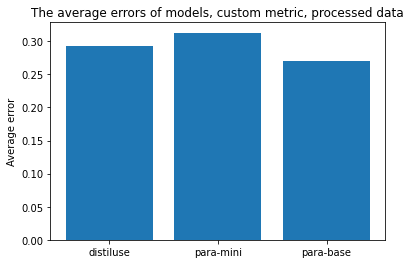

In [22]:
# Processed data
# Compare the average errors of models
average_errors_models_proc = [avg_error_distiluse_proc, avg_error_para_mini_proc, avg_error_para_base_proc]
models = ['distiluse', 'para-mini', 'para-base']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(models, average_errors_models_proc)

ax.set_title('The average errors of models, custom metric, processed data')
ax.set_ylabel('Average error')

plt.savefig('average_errors_models_proc', dpi=300)
plt.show()